RF-PHATE is a supervised dimensionality reduction tool which can be used in exploratory data analysis. To install, please use: `pip install git+https://github.com/jakerhodes/RF-PHATE`.

In [43]:
import rfphate
import seaborn as sns
import pandas as pd

Here we provide a simple example of using RF-PHATE for dimensionality reduction. We use the `titanic` dataset with survival as the response. We use the `dataprep` function to encode categorical variables as numeric and normalize all numeric variables. This function provides us the data, `x` and labels `y`. 

In [44]:
data = rfphate.load_data('titanic')
x, y = rfphate.dataprep(data)

We instantiate an RF-PHATE object and generate the 2-dimensional embedding using the `fit_transform` method.

In [45]:
rfphate_op = rfphate.RFPHATE(random_state = 42)
emb = rfphate_op.fit_transform(x, y)

We can explore variable relationships by coloring the scatterplot of the embedding by different featuers. We start by coloring with the class labels, `Survived'.`

<Axes: >

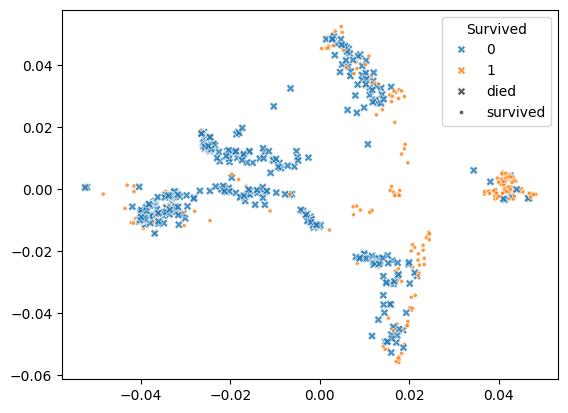

In [46]:
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = y, markers = {'survived': '.', 'died': 'X'}, style = data['Survived'], alpha = .8)

To select features for coloration, we can see which features are most important for the prediction problem using the random forests `feature_importances_`

In [47]:
data.iloc[:, 1:].columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

<Axes: xlabel='None'>

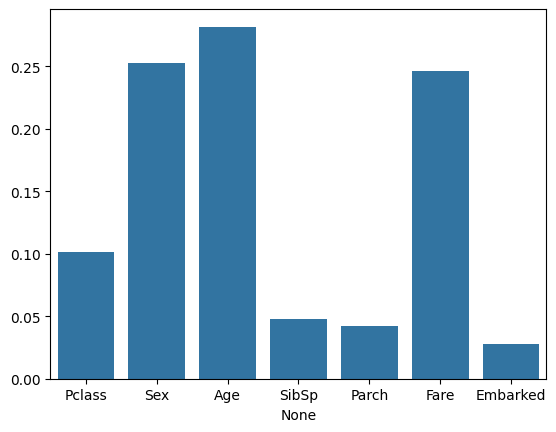

In [48]:
importances = rfphate_op.feature_importances_
sns.barplot(x = data.iloc[:, 1:].columns, y = importances)

<Axes: >

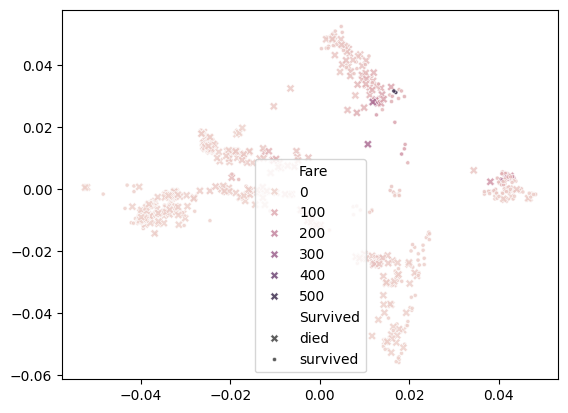

In [49]:
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = data['Fare'], markers = {'survived': '.', 'died': 'X'}, style = data['Survived'], alpha = .8)

<Axes: >

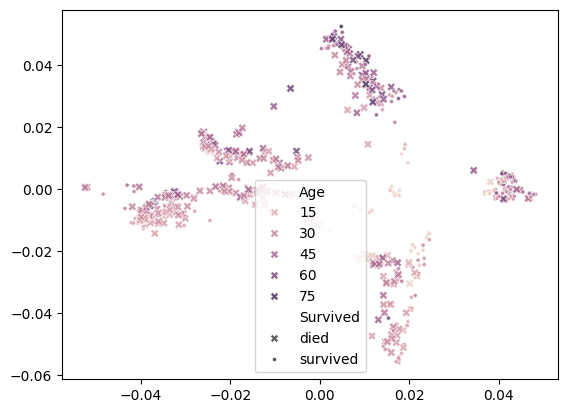

In [50]:
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = data['Age'], markers = {'survived': '.', 'died': 'X'}, style = data['Survived'], alpha = .8)

<Axes: >

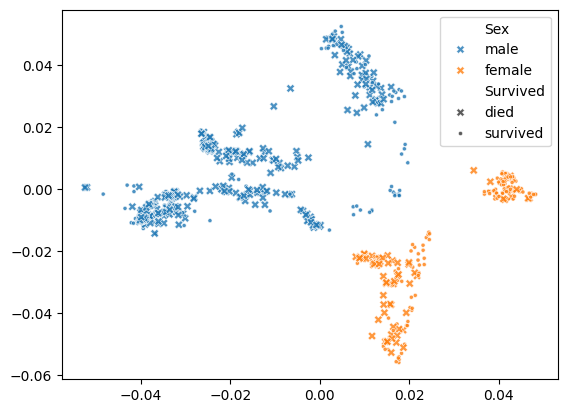

In [51]:
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = data['Sex'], markers = {'survived': '.', 'died': 'X'}, style = data['Survived'], alpha = .8)

<Axes: >

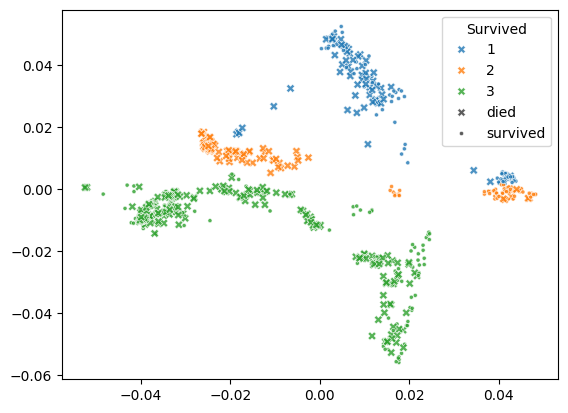

In [53]:
sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = pd.Categorical(data['Pclass']), markers = {'survived': '.', 'died': 'X'}, style = data['Survived'], alpha = .8)